In [1]:
import os
import math
import collections
import itertools
import warnings
import subprocess

import yaml
import pandas as pd

from IPython.display import display, HTML

import matplotlib
matplotlib.use('webagg')

import matplotlib.pyplot as plt

from plotnine import *

import dms_tools2
from dms_tools2.ipython_utils import showPDF
from dms_tools2.plot import COLOR_BLIND_PALETTE_GRAY as PALETTE

%matplotlib inline

print("Using dms_tools2 version {0}".format(dms_tools2.__version__))

# results will go in this directory
resultsdir = './results/' 
if not os.path.isdir(resultsdir):
    os.mkdir(resultsdir)
    
# CPUs to use, -1 means all available
ncpus = 4

# do we use existing results or generate everything new?
use_existing = 'yes'

Using dms_tools2 version 2.6.7


In [2]:
serum_list = [
    'IDC561',
    'IDC0337',
    'IDF141',
    'IDC0396',
    'IDF147',
    'IDF033',
    'IDF065',
    'IDC0245',
    'IDC0136',
    'IDC0546',
    'IDC403',
    'IDC0518',
    'IDC208',
    'IDC0513',
    'IDC0191']

In [3]:
renumberedcountsdir = 'adingens_analysis/results/renumberedcounts'

fracsurvivebatchavg = pd.read_csv("./adingens_analysis/data/diffselbatch.csv", header =0)
fracsurvivebatchavg = fracsurvivebatchavg.sort_values(by='group')
fracsurvivebatchavg = fracsurvivebatchavg.query('group in @serum_list')
display(HTML(fracsurvivebatchavg.to_html(index=False)))

group,name,sel,mock,err,mds_names,libfracsurvive
IDC0136,8500ug-rep1v2b,mtvir-rep1v2b-IDC0136-8500ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0136-8500ug-rep1v2b,0.041266
IDC0136,7000ug-rep1v2b,mtvir-rep1v2b-IDC0136-7000ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0136-7000ug-rep1v2b,0.062973
IDC0136,5500ug-rep1v2b,mtvir-rep1v2b-IDC0136-5500ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0136-5500ug-rep1v2b,0.136001
IDC0191,6000ug-rep3v2a,mtvir-rep3v2a-IDC0191-6000ug,mtvir-rep3v2a,wt-DNA-rep3,IDC0191-6000ug-rep3v2a,0.000492
IDC0245,8000ug-rep3v2a,mtvir-rep3v2a-IDC0245-8000ug,mtvir-rep3v2a,wt-DNA-rep3,IDC0245-8000ug-rep3v2a,0.001751
IDC0337,4000ug-rep1v2b,mtvir-rep1v2b-IDC0337-4000ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0337-4000ug-rep1v2b,0.102009
IDC0337,4500ug-rep1v2b,mtvir-rep1v2b-IDC0337-4500ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0337-4500ug-rep1v2b,0.091161
IDC0337,6000ug-rep1v2b,mtvir-rep1v2b-IDC0337-6000ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0337-6000ug-rep1v2b,0.059010
IDC0396,9000ug-rep3v2a,mtvir-rep3v2a-IDC0396-9000ug,mtvir-rep3v2a,wt-DNA-rep3,IDC0396-9000ug-rep3v2a,0.003734
IDC0513,5000ug-rep3v2a,mtvir-rep3v2a-IDC0513-5000ug,mtvir-rep3v2a,wt-DNA-rep3,IDC0513-5000ug-rep3v2a,0.000975


In [4]:
fracsurvivebatchavgcopy = fracsurvivebatchavg.copy()


names = fracsurvivebatchavg["group"].astype(str) + "-" + fracsurvivebatchavg["name"].astype(str)
names = names.tolist()

In [5]:
fracsurvivebatch = fracsurvivebatchavg.copy()
fracsurvivedir = './results/fracsurviving'
if not os.path.isdir(fracsurvivedir):
    os.mkdir(fracsurvivedir)
fracsurviveaboveavgdir = './results/fracsurvivingaboveaverage'
if not os.path.isdir(fracsurviveaboveavgdir):
    os.mkdir(fracsurviveaboveavgdir) 
fracsurvivebatchfile = os.path.join(fracsurvivedir, 'batch.csv')
print("Here is the batch input that we write to the CSV file {0}:".format(fracsurvivebatchfile))
display(HTML(fracsurvivebatch.to_html(index=False)))
fracsurvivebatch.to_csv(fracsurvivebatchfile, index=False, encoding='utf-8')


for (arg_aboveavg, outdir) in [('', fracsurvivedir), ('--aboveavg yes', fracsurviveaboveavgdir)]:
    print("\nRunning dms2_batch_fracsurvive {0}and writing output to {1}".format(
            {'':'', '--aboveavg yes':'with `--aboveavg yes` '}[arg_aboveavg], outdir))
    log = !dms2_batch_fracsurvive \
            --summaryprefix summary \
            --batchfile {fracsurvivebatchfile} \
            --outdir {outdir} \
            --indir {renumberedcountsdir} \
            --use_existing {use_existing} \
            {arg_aboveavg}
    print("Completed run.")

Here is the batch input that we write to the CSV file ./results/fracsurviving/batch.csv:


group,name,sel,mock,err,mds_names,libfracsurvive
IDC0136,8500ug-rep1v2b,mtvir-rep1v2b-IDC0136-8500ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0136-8500ug-rep1v2b,0.041266
IDC0136,7000ug-rep1v2b,mtvir-rep1v2b-IDC0136-7000ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0136-7000ug-rep1v2b,0.062973
IDC0136,5500ug-rep1v2b,mtvir-rep1v2b-IDC0136-5500ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0136-5500ug-rep1v2b,0.136001
IDC0191,6000ug-rep3v2a,mtvir-rep3v2a-IDC0191-6000ug,mtvir-rep3v2a,wt-DNA-rep3,IDC0191-6000ug-rep3v2a,0.000492
IDC0245,8000ug-rep3v2a,mtvir-rep3v2a-IDC0245-8000ug,mtvir-rep3v2a,wt-DNA-rep3,IDC0245-8000ug-rep3v2a,0.001751
IDC0337,4000ug-rep1v2b,mtvir-rep1v2b-IDC0337-4000ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0337-4000ug-rep1v2b,0.102009
IDC0337,4500ug-rep1v2b,mtvir-rep1v2b-IDC0337-4500ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0337-4500ug-rep1v2b,0.091161
IDC0337,6000ug-rep1v2b,mtvir-rep1v2b-IDC0337-6000ug,mtvir-rep1v2b,wt-DNA-rep1,IDC0337-6000ug-rep1v2b,0.059010
IDC0396,9000ug-rep3v2a,mtvir-rep3v2a-IDC0396-9000ug,mtvir-rep3v2a,wt-DNA-rep3,IDC0396-9000ug-rep3v2a,0.003734
IDC0513,5000ug-rep3v2a,mtvir-rep3v2a-IDC0513-5000ug,mtvir-rep3v2a,wt-DNA-rep3,IDC0513-5000ug-rep3v2a,0.000975



Running dms2_batch_fracsurvive and writing output to ./results/fracsurviving
Completed run.

Running dms2_batch_fracsurvive with `--aboveavg yes` and writing output to ./results/fracsurvivingaboveaverage
Completed run.



avgfracsurvive correlations:


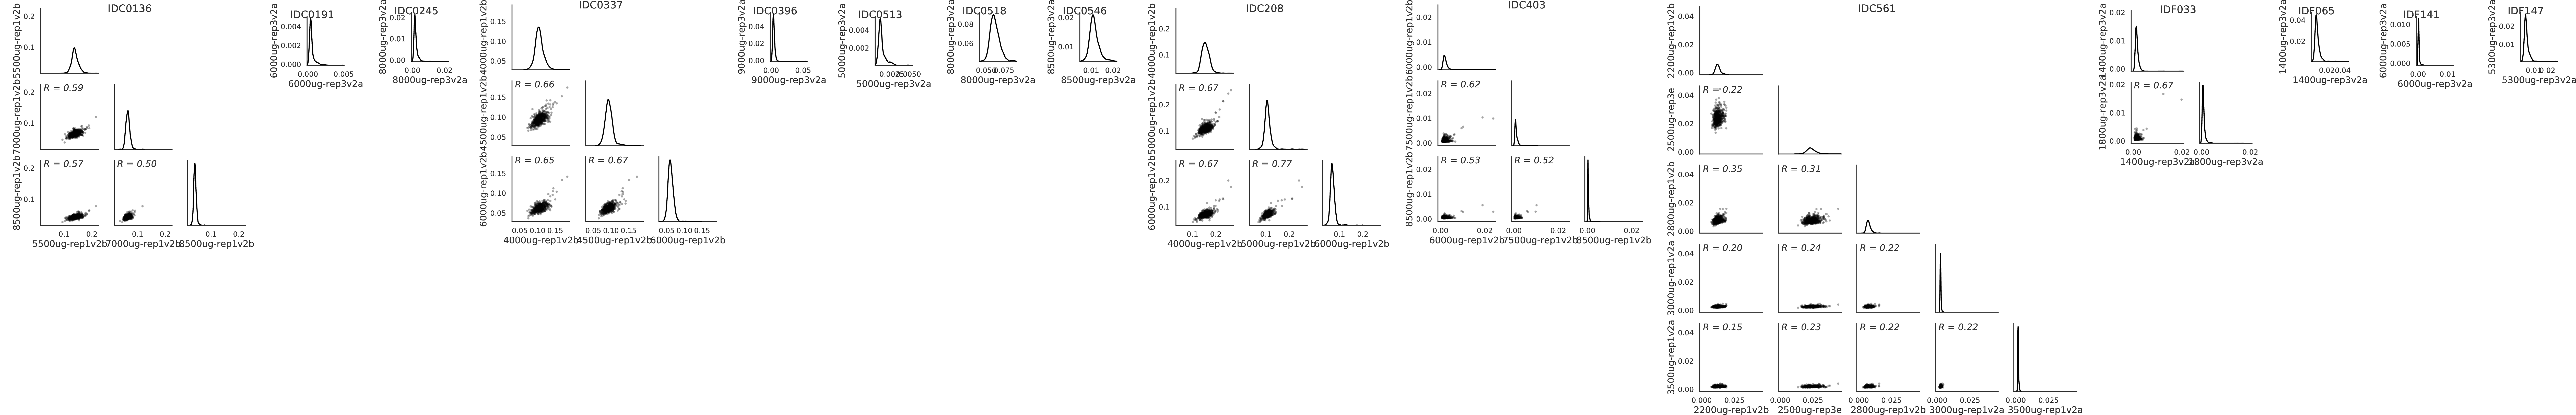


maxfracsurvive correlations:


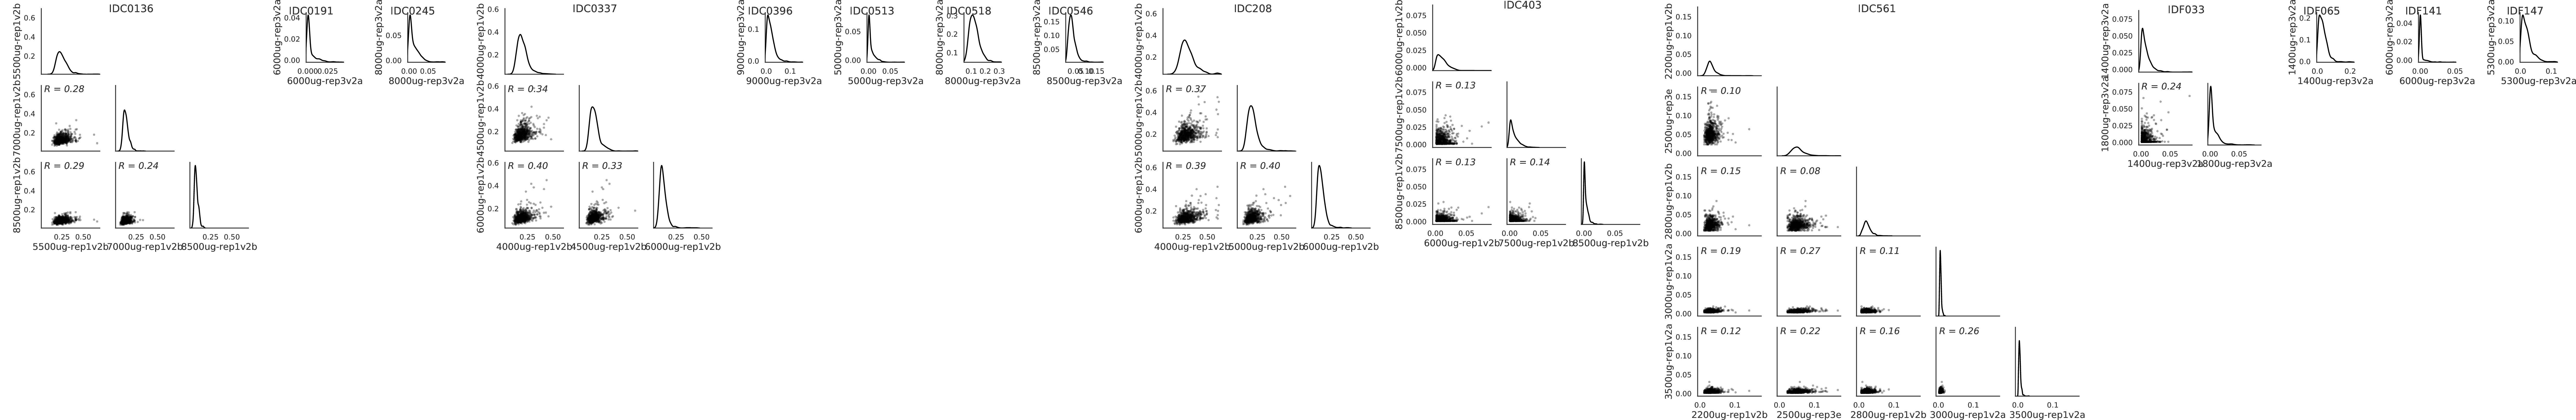

In [6]:
fracsurviveprefix = os.path.join(fracsurvivedir, 'summary_')
groups = fracsurvivebatchavg['group'].unique()
for seltype in ['avgfracsurvive', 'maxfracsurvive']:
    print("\n{0} correlations:".format(seltype))
    plots = []
    for g in groups:
        plot = fracsurviveprefix + g + '-' + seltype + 'corr.pdf'
        if os.path.isfile(plot):
            plots.append(plot)
        else:
            print("{0} does not exist.".format(plot))
    showPDF(plots, width=1800)